<a href="https://colab.research.google.com/github/Santiago-R/aupa.ai/blob/main/01_Explora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.IMAGEWOOF)  # 2 minutes

In [4]:
lbl_dict = dict(
  n02093754='Australian terrier', 
  n02089973='Border terrier', 
  n02099601='Samoyed', 
  n02087394='Beagle', 
  n02105641='Shih-Tzu', 
  n02096294='English foxhound', 
  n02088364='Rhodesian ridgeback', 
  n02115641='Dingo', 
  n02111889='Golden retriever', 
  n02086240='Old English sheepdog'
)

In [5]:
def dog_breed(img_name):
    return lbl_dict[img_name.split('_')[0]]

In [6]:
doggy_files = L([p for p in get_image_files(path) if p.name[0]=='n'])

In [7]:
dls = ImageDataLoaders.from_name_func(
    path,
    doggy_files,
    valid_pct = 0.2,
    label_func = dog_breed,
    item_tfms = Resize(224)
)

In [8]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 280MB/s]


In [9]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.499596,0.208722,0.934137,01:55


# ¿¿Qué acabamos de hacer??

#### Carga de imágenes

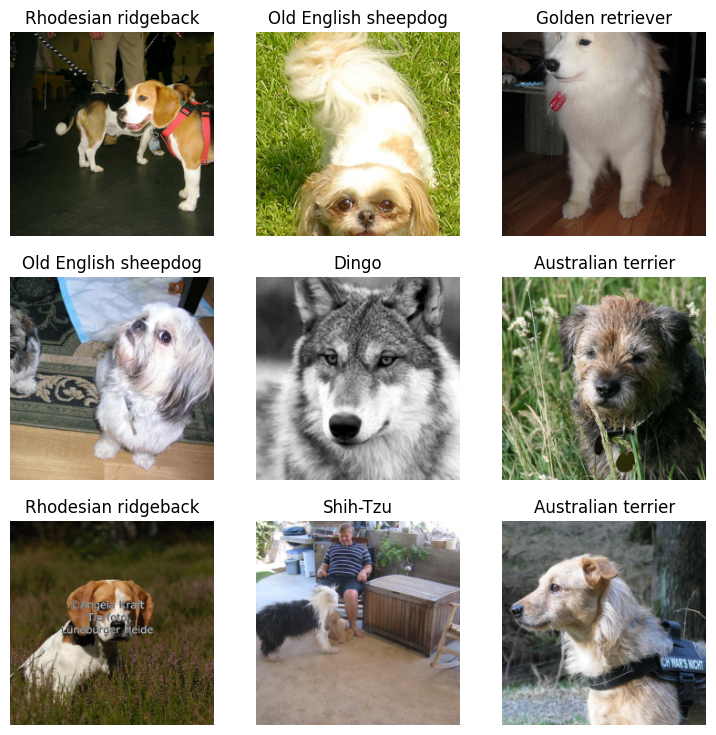

In [20]:
dls.show_batch()

In [11]:
len(dls[0]), len(dls[1])

(155, 39)

In [12]:
ImageDataLoaders.from_name_func??

#### Entrenamiento

In [15]:
learn.fit_one_cycle?

In [16]:
learn.fit_one_cycle??

Busca en Google 1Cycle policy  

https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

In [17]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

lr = SuggestedLRs(valley=0.0014454397605732083)


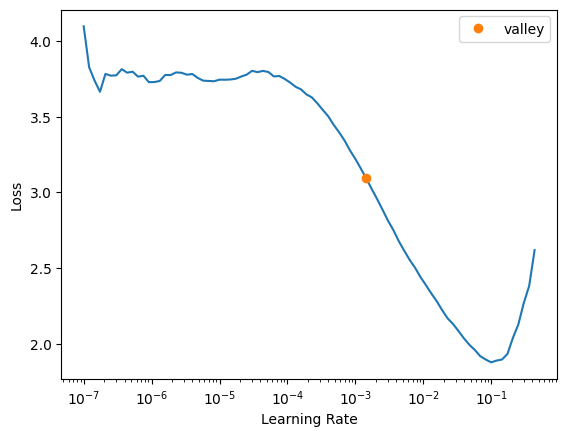

In [18]:
lr = learn.lr_find()
print(f'lr = {lr}')

In [19]:
learn.fit_one_cycle(5, lr_max=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.582626,0.211312,0.930924,01:49
1,0.312731,0.209925,0.938956,01:44
2,0.238168,0.207381,0.936948,01:48
3,0.181048,0.194602,0.940964,01:48
4,0.149775,0.191341,0.939759,01:49
